In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from jupyterthemes import jtplot #These last two lines can be skipped if you are not using jupyter themes
jtplot.reset()

In [2]:
x, theta, eta, drs, dy10, dy20, u0 = sp.symbols ('x theta eta drs dy10 dy20 u0')

In [3]:
k = 0.2

In [4]:
#Every variable correspond to the one with tilde in Habara Yamamoto 2018
phi0 = 4*k*x/u0
dphi = 4*k*x/u0*(sp.sqrt( 1 - eta*sp.cos(2*(theta))) - 1)

In [5]:
Delta = drs**2 - (1/x * sp.diff(dphi, theta) - dy10*sp.sin(theta) + dy20*sp.cos(theta) )**2
#Actually it's Deltaa**2

In [6]:
dx1 = 1/(1-sp.diff(sp.diff(phi0, x), x))*(   sp.diff(dphi, x) + 
                                         dy10*sp.cos(theta) + dy20*sp.sin(theta) + sp.sqrt(Delta))

In [7]:
dx2 = 1/(1-sp.diff(sp.diff(phi0, x), x))*(   sp.diff(dphi, x) + 
                                         dy10*sp.cos(theta) + dy20*sp.sin(theta) - sp.sqrt(Delta))

In [8]:
#For the critic lines
dx =  1/(1-sp.diff(sp.diff(phi0, x), x))*( sp.diff(dphi, x) + sp.diff(sp.diff(dphi,theta),theta) )

In [9]:
thetaa = np.linspace(0,2*np.pi,5000)

<IPython.core.display.Javascript object>


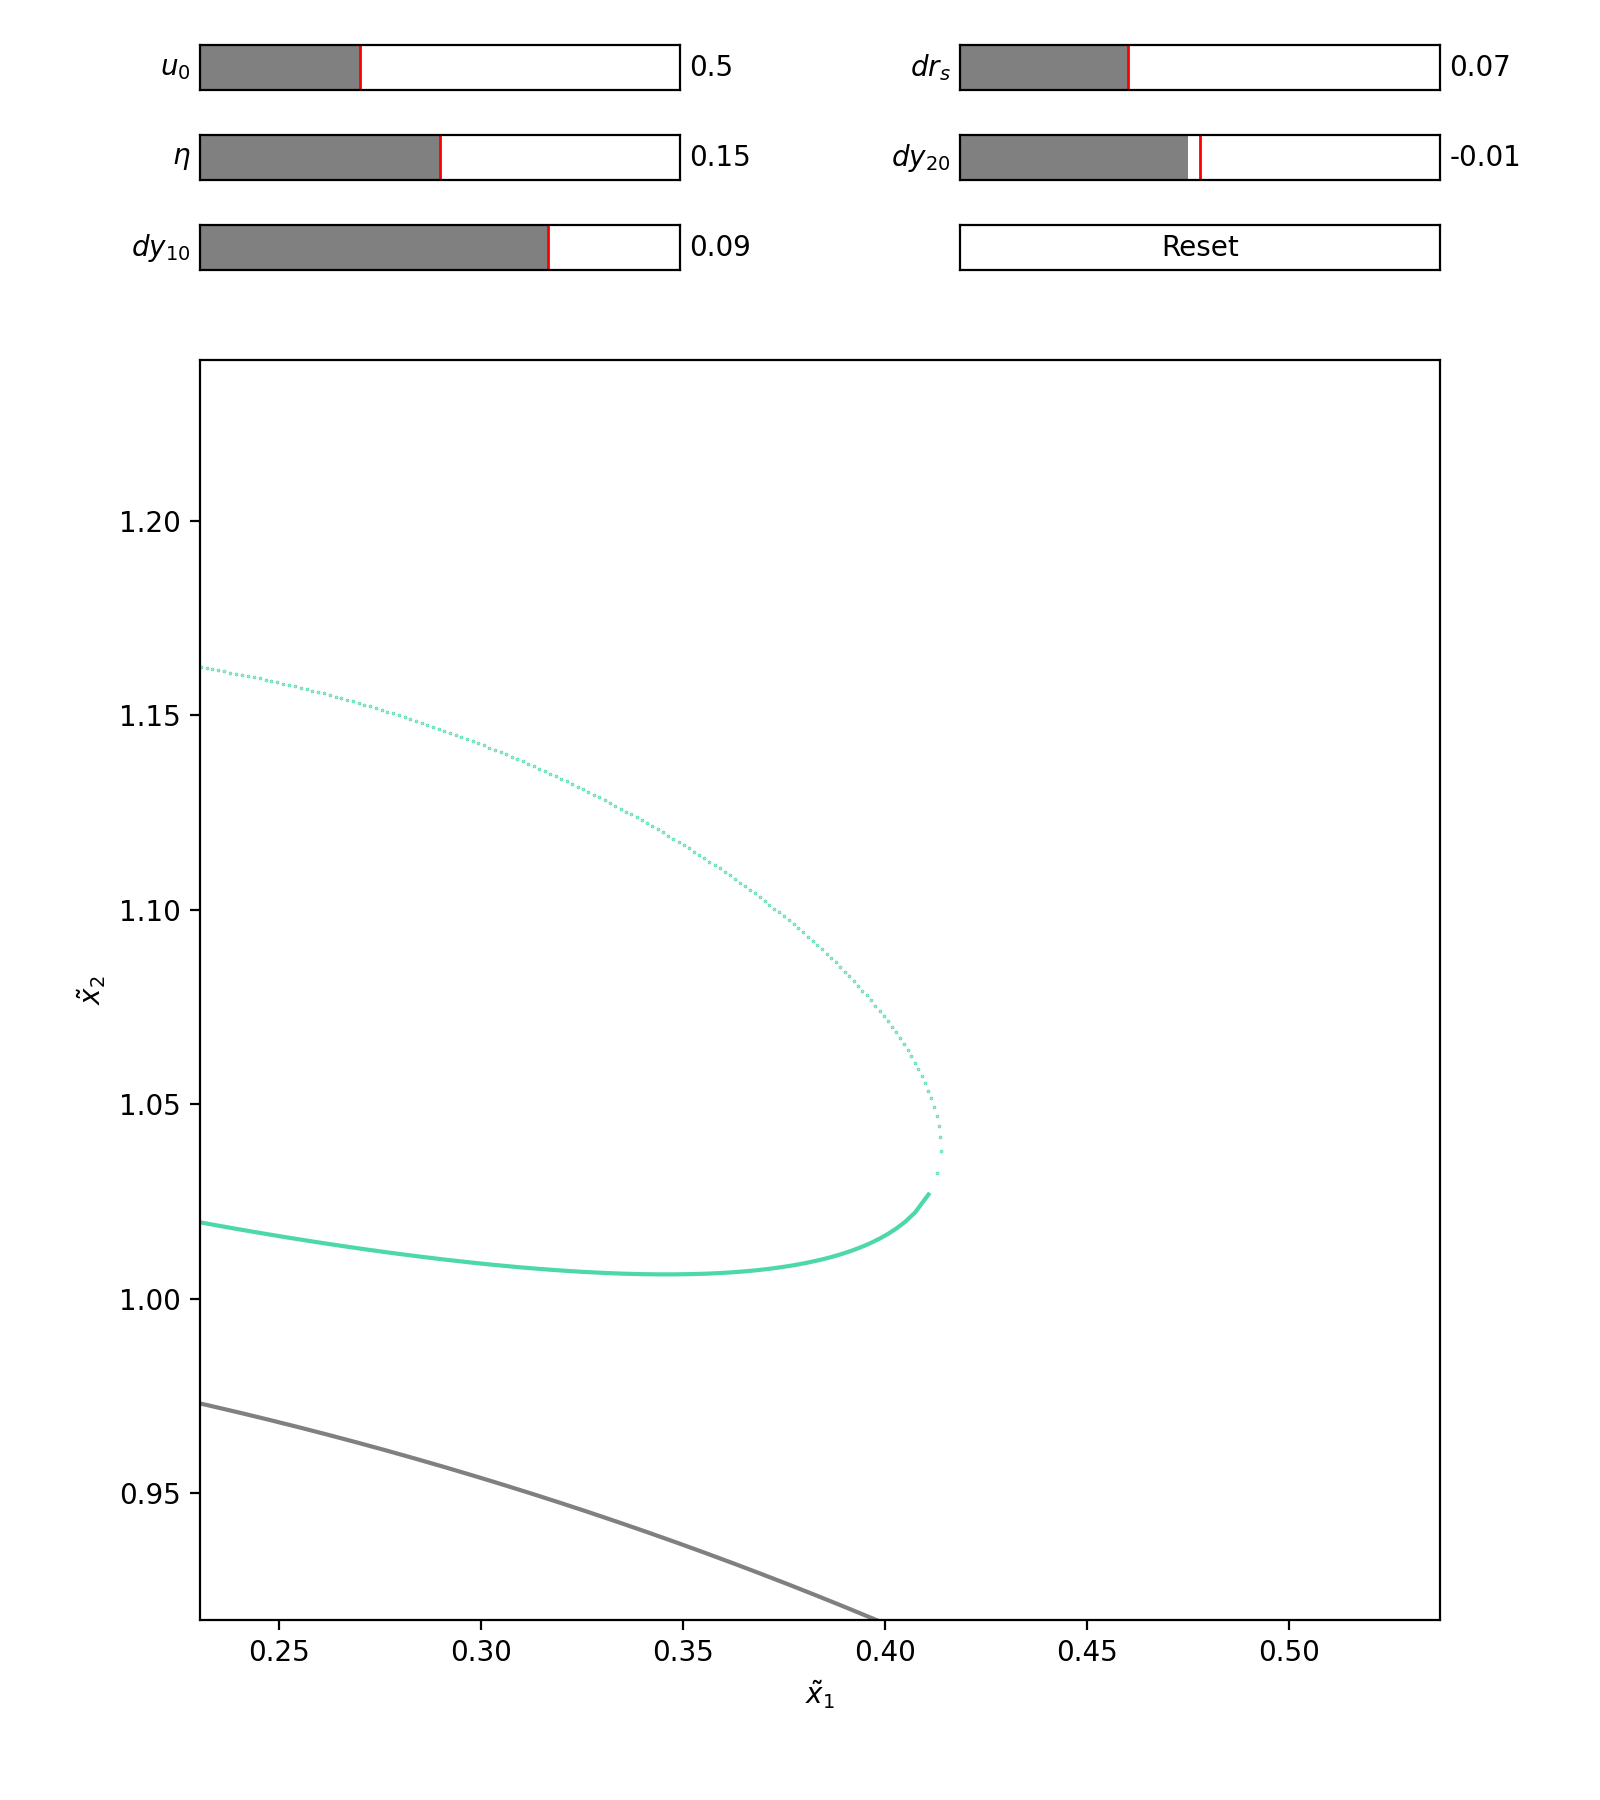

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.24*sqrt(0.0850694444444444 - (-0.375*sin(theta) + sin(2*theta)/sqrt(1 - 0.15*cos(2*theta)))**2) + 1.6*sqrt(1 - 0.15*cos(2*theta)) + 0.09*cos(theta) - 1.6)
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-0.24*sqrt(0.0850694444444444 - (-0.375*sin(theta) + sin(2*theta)/sqrt(1 - 0.15*cos(2*theta)))**2) + 1.6*sqrt(1 - 0.15*cos(2*theta)) + 0.09*cos(theta) - 1.6)


0

In [10]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 9),num="LENSTOMI")
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.1, top=0.8)
ax_r = fig.add_axes([0.125, 0.95, 0.3, 0.025])
ax_eta = fig.add_axes([0.125, 0.9, 0.3, 0.025])
ax_dy10 = fig.add_axes([0.125, 0.85, 0.3, 0.025])
ax_dy20 = fig.add_axes([0.6, 0.9, 0.3, 0.025])
ax_drs = fig.add_axes([0.6, 0.95, 0.3, 0.025])

s_r = Slider(ax=ax_r, label='$u_{0}$', valmin=0, valmax=1.5,valinit = 0.5,
              valfmt='%1.2g', facecolor='grey')
s_eta = Slider(ax=ax_eta,label= '$\eta$', valmin=0, valmax=0.3, 
             valinit=0.15, valfmt='%1.2g', facecolor='grey')
s_dy10 = Slider(ax=ax_dy10,label= '$dy_{10}$', valmin=-0.2, valmax=0.2, 
             valinit=0.09, valfmt='%1.2g', facecolor='grey')
s_dy20 = Slider(ax=ax_dy20,label= '$dy_{20}$', valmin=-0.2, valmax=0.2, 
             valinit=0, valfmt='%1.2g', facecolor='grey')
s_drs = Slider(ax=ax_drs,label= '$dr_{s}$', valmin=0, valmax=0.2, 
             valinit=0.07, valfmt='%1.2g', facecolor='grey')

u00 = 0.5
etaa = 0.15
dy100 = 0.09
dy200 = 0
drss = 0.07

def r(x,y):   #x = eta y = theta
    return np.sqrt(1-x*np.cos(2*y)) + x*( - (1-x*np.cos(2*y))**(-3/2)*x*np.sin(2*y)**2
                                      + 2*np.cos(2*y)*np.sqrt(1-x*np.cos(2*y))   )
def r1(x,y):
    return 1/np.sqrt(1-x*np.cos(2*y))


f1 = sp.lambdify(theta, dx1.subs([ (u0,u00) , (x,1) , (eta,etaa) , (dy10,dy100), (dy20,dy200), (drs,drss) ]) ) #f1 = x1(theta) (perturbation in terms of radii of the first image))
f2 = sp.lambdify(theta, dx2.subs([ (u0,u00) ,(x,1) , (eta,etaa) , (dy10,dy100), (dy20,dy200), (drs,drss) ]) )  #f2 = x2(theta)
f3 = sp.lambdify(theta, dx.subs([ (u0,u00), (x,1) , (eta,etaa) , (dy10,dy100), (dy20,dy200), (drs,drss) ]) )   #critic line dr(theta)

f_d1 = ax.scatter((1 + f1(thetaa))*np.cos(thetaa), 
         (1 + f1(thetaa))*np.sin(thetaa) , color = '#4cd8a7', s = .1)
tom = np.array([(1 + f1(thetaa))*np.cos(thetaa),(1 + f1(thetaa))*np.sin(thetaa)])
tom2 = np.transpose(tom)
f_d1.set_offsets(tom2) #You can pass it an array of shape (N, 2) or a list of N 2-tuples -- each 2-tuple being an (x,y) coordinate.
f_d2, = ax.plot((1 + f2(thetaa))*np.cos(thetaa), 
         (1 + f2(thetaa))*np.sin(thetaa), marker = '' , markersize=5 , color = '#4cd8a7')
f_d3, = ax.plot(1*np.cos(thetaa), 1*np.sin(thetaa), marker = '' , markersize=5 , color = 'grey')
f_d4, = ax.plot(dy100+drss*np.cos(thetaa), dy200+drss*np.sin(thetaa), marker = '' , markersize=5 , color = 'grey')
f_d5, = ax.plot(0.3*r(etaa,thetaa)*np.cos(thetaa) - 1.25,
                0.3*r(etaa,thetaa)*np.sin(thetaa) +1.25,
                marker = '' , markersize=5 , color = 'lightblue')
f_d6, = ax.plot(0.3*r1(etaa,thetaa)*np.cos(thetaa) + 1.25,
                0.3*r1(etaa,thetaa)*np.sin(thetaa) +1.25,
                marker = '' , markersize=5 , color = 'lightblue')
f_d7, = ax.plot(0.3*(1 + f3(thetaa))*np.cos(thetaa) - 1.25,
                0.3*(1 + f3(thetaa))*np.sin(thetaa) -1.25,
                marker = '' , markersize=5 , color = 'lightblue')
ax.text(-1.5, 0.75,'Equi-densidad \n    de masa')
ax.text(1, 0.85,'Equipotencial')
ax.text(-1.5, -1.67,'Curva Crítica')
ax.axis([-(1.3+.4), 1.3+.4,-(1.3+.4), 1.3+.4])
ax.set_xlabel(r'$\tilde{x}_{1}$')
ax.set_ylabel(r'$\tilde{x}_{2}$')
ax.axhline(0, linestyle='-',lw =0.5 ,color='grey') # horizontal lines
ax.axvline(0, linestyle='-',lw =0.5, color='grey') # vertical lines
# Update values
def update(val):
    
    print('ins')
    
    u00 = s_r.val
    etaa = s_eta.val
    dy100 = s_dy10.val
    dy200 = s_dy20.val
    drss = s_drs.val
    f1 = sp.lambdify(theta, dx1.subs([(u0,u00) , (x,1) , (eta,etaa) , (dy10,dy100), (dy20,dy200), (drs,drss) ]) )
    f2 = sp.lambdify(theta, dx2.subs([ (u0,u00) ,(x,1) , (eta,etaa) , (dy10,dy100), (dy20,dy200), (drs,drss) ]) )
    f3 = sp.lambdify(theta, dx.subs([(u0,u00) , (x,1) , (eta,etaa) , (dy10,dy100), (dy20,dy200), (drs,drss) ]) )
    
    tom = np.array([(1 + f1(thetaa))*np.cos(thetaa),(1 + f1(thetaa))*np.sin(thetaa)])
    tom2 = np.transpose(tom)
    f_d1.set_offsets(tom2)
    f_d2.set_data((1 + f2(thetaa))*np.cos(thetaa),(1 + f2(thetaa))*np.sin(thetaa))
    f_d3.set_data(1*np.cos(thetaa), 1*np.sin(thetaa))
    f_d4.set_data(dy100+drss*np.cos(thetaa), dy200+drss*np.sin(thetaa))
    f_d5.set_data(0.3*r(etaa,thetaa)*np.cos(thetaa) - 1.25,
                0.3*r(etaa,thetaa)*np.sin(thetaa) +1.25 )
    f_d6.set_data(0.3*r1(etaa,thetaa)*np.cos(thetaa) + 1.25,
                0.3*r1(etaa,thetaa)*np.sin(thetaa) +1.25)
    f_d7.set_data(0.3*(1 + f3(thetaa))*np.cos(thetaa) - 1.25,
                0.3*(1 + f3(thetaa))*np.sin(thetaa) -1.25)
    fig.canvas.draw_idle()
    
    
s_r.on_changed(update)
s_eta.on_changed(update)
s_dy10.on_changed(update)
s_dy20.on_changed(update)
s_drs.on_changed(update)


resetax = plt.axes([0.6, 0.85, 0.3, 0.025])
button = Button(resetax, 'Reset', color='white', hovercolor='0.975')

def reset(event):
    s_r.reset()
    s_eta.reset()
    s_dy10.reset()
    s_dy20.reset()
    s_drs.reset()
button.on_clicked(reset)